In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import joblib


# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)

In [80]:
def ModelEvaluation(model,X_test, y_test):
    #1.  R2 Score
    score = model.score(X_test, y_test)
    print("R^2 Score:", score)
    
    #2. Mean Absolute Error (MAE) and Mean Squared Error (MSE)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)

    #3. RMSE is the square root of MSE. It gives an indication of the average magnitude of the errors.
    rmse = np.sqrt(mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    
    #4. Residuals are the differences between the observed and predicted values. Analyzing residuals helps in understanding the model’s performance and checking for patterns.
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()

## 1. Preprocessing before Regression

In [81]:
# Read data
leap_df = pd.read_csv('./data/leap_prepared_scaled.csv')

In [82]:
leap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9561 entries, 0 to 9560
Data columns (total 12 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   country                                      6230 non-null   object 
 1   year                                         6230 non-null   float64
 2   life_expectancy                              6230 non-null   float64
 3   population                                   6230 non-null   float64
 4   annual_co2_emissions_scaled                  6230 non-null   float64
 5   animal_protein_per_day_person_scaled         6230 non-null   float64
 6   fat_per_day_person_scaled                    6230 non-null   float64
 7   carbs_per_day_person_scaled                  6230 non-null   float64
 8   fertility rate_scaled                        6230 non-null   float64
 9   rural population_by_pop_scaled               6230 non-null   float64
 10  

In [83]:
# Rename column 'B' to 'NewName' in place
leap_df.rename(columns={'fertility rate_scaled': 'fertility_rate_scaled','rural population_by_pop_scaled': 'rural_population_by_pop_scaled' }, inplace=True)

In [84]:
leap_df.columns

Index(['country', 'year', 'life_expectancy', 'population',
       'annual_co2_emissions_scaled', 'animal_protein_per_day_person_scaled',
       'fat_per_day_person_scaled', 'carbs_per_day_person_scaled',
       'fertility_rate_scaled', 'rural_population_by_pop_scaled',
       'fixed_line_subscription_per_hundred_scaled',
       'mobile_line_subscription_per_hundred_scaled'],
      dtype='object')

In [85]:
leap_df.head()

,country,year,life_expectancy,population,annual_co2_emissions_scaled,animal_protein_per_day_person_scaled,fat_per_day_person_scaled,carbs_per_day_person_scaled,fertility_rate_scaled,rural_population_by_pop_scaled,fixed_line_subscription_per_hundred_scaled,mobile_line_subscription_per_hundred_scaled
0,NaN,NaN,NaN,NaN,0.000057,0.117832,0.163895,0.768924,0.901152,0.899555,0.001935,0.0
1,NaN,NaN,NaN,NaN,0.000053,0.125285,0.175421,0.795939,0.903848,0.895044,0.001955,0.0
2,NaN,NaN,NaN,NaN,0.000064,0.119513,0.153494,0.622233,0.908038,0.890430,0.001914,0.0
3,NaN,NaN,NaN,NaN,0.000058,0.119498,0.152615,0.687172,0.909156,0.885680,0.002139,0.0
4,NaN,NaN,NaN,NaN,0.000060,0.120085,0.161563,0.680974,0.910971,0.880794,0.002132,0.0


## 2. Drop rows with any missing values and reset the index in one line

In [86]:
leap_df_cleaned = leap_df.dropna().reset_index(drop=True)

# Remove spaces from country name
leap_df_cleaned['country'] = leap_df_cleaned['country'].str.replace(' ', '')

# Remove special characters from country name
leap_df_cleaned['country'] = leap_df_cleaned['country'].str.replace('[^a-zA-Z0-9]', '')

# save the cleaned DataFrame back to a CSV file
leap_df_cleaned.to_csv('./data/cleaned_file.csv', index=False)

In [87]:
#get all the country name from the cleaned data set
CountryNames = leap_df_cleaned["country"]
CountryNames = CountryNames.unique()
CountryNames

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'AntiguaandBarbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'BosniaandHerzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'BurkinaFaso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'CentralAfricanRepublic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'CostaRica', "Coted'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica',
       'DominicanRepublic', 'Ecuador', 'ElSalvador', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'FrenchPolynesia', 'Gabon', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy'], dtype=object)

In [88]:
leap_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 12 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   country                                      2899 non-null   object 
 1   year                                         2899 non-null   float64
 2   life_expectancy                              2899 non-null   float64
 3   population                                   2899 non-null   float64
 4   annual_co2_emissions_scaled                  2899 non-null   float64
 5   animal_protein_per_day_person_scaled         2899 non-null   float64
 6   fat_per_day_person_scaled                    2899 non-null   float64
 7   carbs_per_day_person_scaled                  2899 non-null   float64
 8   fertility_rate_scaled                        2899 non-null   float64
 9   rural_population_by_pop_scaled               2899 non-null   float64
 10  

In [89]:
leap_df_cleaned["population"].min()

53276.0

In [90]:
afgDF=leap_df_cleaned[leap_df_cleaned['country']=='Afghanistan']

In [91]:
#Corr WRT to LE from the exclding the first column country(Which is a string)
afgDF.iloc[:,1:].corr()['life_expectancy']

year                                           0.950525
life_expectancy                                1.000000
population                                     0.906667
annual_co2_emissions_scaled                   -0.499836
animal_protein_per_day_person_scaled           0.873055
fat_per_day_person_scaled                      0.931494
carbs_per_day_person_scaled                    0.607808
fertility_rate_scaled                         -0.921159
rural_population_by_pop_scaled                -0.927729
fixed_line_subscription_per_hundred_scaled     0.693663
mobile_line_subscription_per_hundred_scaled   -0.561480
Name: life_expectancy, dtype: float64

We can see that when all the countries are combined; the data does not give relation with the predictive variables and this mi

When dealing with a dataset that includes multiple countries and years, the relationships between the independent variables (predictors) and the dependent variable (e.g., life expectancy) can vary significantly across countries. This can obscure the correlations when looking at the entire dataset together. However, there are ways to model these relationships more effectively using regression techniques that account for the structure of your data.

In [92]:
# One-hot encode the 'country' column
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_countries = one_hot_encoder.fit_transform(leap_df_cleaned[['country']])

# Create a DataFrame with the encoded country columns
encoded_countries_df = pd.DataFrame(encoded_countries, columns=one_hot_encoder.get_feature_names(['country']))

# Concatenate the original DataFrame (without 'country' column) with the encoded countries DataFrame
leap_df_cleaned = pd.concat([leap_df_cleaned.drop(columns=['country']), encoded_countries_df], axis=1)

In [93]:
leap_df_cleaned.tail()

,year,life_expectancy,population,annual_co2_emissions_scaled,animal_protein_per_day_person_scaled,fat_per_day_person_scaled,carbs_per_day_person_scaled,fertility_rate_scaled,rural_population_by_pop_scaled,fixed_line_subscription_per_hundred_scaled,mobile_line_subscription_per_hundred_scaled,country_Albania,country_Algeria,country_Angola,country_AntiguaandBarbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bermuda,country_Bhutan,country_Bolivia,country_BosniaandHerzegovina,country_Botswana,country_Brazil,country_Bulgaria,country_BurkinaFaso,country_Burundi,country_Cambodia,country_Cameroon,country_Canada,country_CentralAfricanRepublic,country_Chad,country_Chile,country_China,country_Colombia,country_Comoros,country_CostaRica,country_Coted'Ivoire,country_Croatia,country_Cuba,country_Cyprus,country_Czechia,country_Denmark,country_Djibouti,country_Dominica,country_DominicanRepublic,country_Ecuador,country_ElSalvador,country_Estonia,country_Eswatini,country_Ethiopia,country_Fiji,country_Finland,country_France,country_FrenchPolynesia,country_Gabon,country_Georgia,country_Germany,country_Ghana,country_Greece,country_Grenada,country_Guatemala,country_Guinea,country_Guinea-Bissau,country_Guyana,country_Haiti,country_Honduras,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iraq,country_Ireland,country_Israel,country_Italy
2894,1983.0,74.7,56607516.0,0.000284,0.227121,0.310232,0.203167,0.374495,0.705236,0.023144,0.402654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2895,1984.0,75.5,56620236.0,0.000259,0.214333,0.288890,0.179097,0.365417,0.705851,0.019592,0.431671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2896,1985.0,75.6,56636468.0,0.000318,0.208414,0.297002,0.179409,0.358810,0.706142,0.019542,0.387520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2897,1986.0,75.9,56639056.0,0.000300,0.206261,0.249308,0.082723,0.350471,0.706132,0.018935,0.388331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2898,1987.0,76.3,56644528.0,0.000286,0.201758,0.277858,0.121093,0.342887,0.705799,0.017600,0.380402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Regression

In [94]:
# Define the feature matrix (X) and the target variable (y)
X = leap_df_cleaned.drop(columns=['life_expectancy'])
y = leap_df_cleaned['life_expectancy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
LRmodel = LinearRegression()
LRmodel.fit(X_train, y_train)

# Print the coefficients and intercept
print("linear regression Model")
print("Coefficients:", LRmodel.coef_)
print("Intercept:", LRmodel.intercept_)

linear regression Model
Coefficients: [ 2.61172736e-01  1.22427283e-08 -3.63404550e+00  2.85600872e+00
 -5.48989886e-01  5.30505399e-01 -1.68982574e+00  6.63189086e-01
 -3.31803414e+00 -2.65696525e-01  2.47665169e+01  1.70308078e+01
 -1.95870108e+00  2.48287897e+01  2.30177095e+01  2.01958757e+01
  2.85343916e+01  2.69657731e+01  1.54051350e+01  2.59376520e-10
  1.08574860e+01  2.43616982e+01  1.83071616e+01  2.64456078e+01
  2.02798437e+01  4.30989732e+00  2.81291861e+01  1.66563380e+01
  1.02377873e+01  2.13008854e+01  8.63613315e+00  1.63949662e+01
  2.12830385e+01  1.22659957e+00  5.48312987e+00  1.13507006e+01
  4.86743997e+00  2.86292584e+01 -9.97651051e-01 -2.95415602e+00
  2.46722751e+01  6.08930292e+00  2.11155370e+01  8.91338208e+00
  2.64464208e+01  3.82853355e+00  2.33529774e+01  2.51450551e+01
  2.62425131e+01  2.40471934e+01  2.72919515e+01  6.95138013e+00
  1.99847983e+01  1.85531168e+01  2.04820141e+01  1.48512861e+01
  2.17065807e+01  4.29962086e+00  2.91103844e+00  1.

In [95]:
#Model predictors
ColNames = X_train.columns
ColNames = ColNames.to_list()
ColNames

['year',
 'population',
 'annual_co2_emissions_scaled',
 'animal_protein_per_day_person_scaled',
 'fat_per_day_person_scaled',
 'carbs_per_day_person_scaled',
 'fertility_rate_scaled',
 'rural_population_by_pop_scaled',
 'fixed_line_subscription_per_hundred_scaled',
 'mobile_line_subscription_per_hundred_scaled',
 'country_Albania',
 'country_Algeria',
 'country_Angola',
 'country_AntiguaandBarbuda',
 'country_Argentina',
 'country_Armenia',
 'country_Australia',
 'country_Austria',
 'country_Azerbaijan',
 'country_Bahrain',
 'country_Bangladesh',
 'country_Barbados',
 'country_Belarus',
 'country_Belgium',
 'country_Belize',
 'country_Benin',
 'country_Bermuda',
 'country_Bhutan',
 'country_Bolivia',
 'country_BosniaandHerzegovina',
 'country_Botswana',
 'country_Brazil',
 'country_Bulgaria',
 'country_BurkinaFaso',
 'country_Burundi',
 'country_Cambodia',
 'country_Cameroon',
 'country_Canada',
 'country_CentralAfricanRepublic',
 'country_Chad',
 'country_Chile',
 'country_China',
 '

In [96]:
#Column names to be exported with the model

# ColNames = (
#        'year', 'population', 'annual_co2_emissions_scaled',
#        'animal_protein_per_day_person_scaled', 'fat_per_day_person_scaled',
#        'carbs_per_day_person_scaled', 'fertility_rate_scaled',
#        'rural_population_by_pop_scaled',
#        'fixed_line_subscription_per_hundred_scaled',
#        'mobile_line_subscription_per_hundred_scaled', 'country_Albania',
#        'country_Algeria', 'country_Angola', 'country_AntiguaandBarbuda',
#        'country_Argentina', 'country_Armenia', 'country_Australia',
#        'country_Austria', 'country_Azerbaijan', 'country_Bahrain',
#        'country_Bangladesh', 'country_Barbados', 'country_Belarus',
#        'country_Belgium', 'country_Belize', 'country_Benin', 'country_Bermuda',
#        'country_Bhutan', 'country_Bolivia', 'country_BosniaandHerzegovina',
#        'country_Botswana', 'country_Brazil', 'country_Bulgaria',
#        'country_BurkinaFaso', 'country_Burundi', 'country_Cambodia',
#        'country_Cameroon', 'country_Canada', 'country_CentralAfricanRepublic',
#        'country_Chad', 'country_Chile', 'country_China', 'country_Colombia',
#        'country_Comoros', 'country_CostaRica', "country_Coted'Ivoire",
#        'country_Croatia', 'country_Cuba', 'country_Cyprus', 'country_Czechia',
#        'country_Denmark', 'country_Djibouti', 'country_Dominica',
#        'country_DominicanRepublic', 'country_Ecuador', 'country_ElSalvador',
#        'country_Estonia', 'country_Eswatini', 'country_Ethiopia',
#        'country_Fiji', 'country_Finland', 'country_France',
#        'country_FrenchPolynesia', 'country_Gabon', 'country_Georgia',
#        'country_Germany', 'country_Ghana', 'country_Greece', 'country_Grenada',
#        'country_Guatemala', 'country_Guinea', 'country_Guinea-Bissau',
#        'country_Guyana', 'country_Haiti', 'country_Honduras',
#        'country_Hungary', 'country_Iceland', 'country_India',
#        'country_Indonesia', 'country_Iraq', 'country_Ireland',
#        'country_Israel', 'country_Italy'
#     )

Evaluate the model

R^2 Score: 0.9165429111407153
Mean Absolute Error (MAE): 1.7202511060235335
Mean Squared Error (MSE): 8.527399195809123
Root Mean Squared Error (RMSE): 2.920171090160493


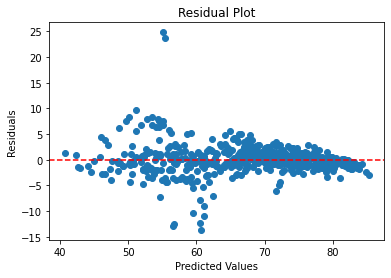

In [97]:
#LR Model Evaluation 
ModelEvaluation(LRmodel,X_test, y_test)

Regression using Statsmodels api

In [98]:
#Regression using Statsmodels api
# Add a constant (intercept) to the model
X_train_sm = sm.add_constant(X_train)

# Fit the model using statsmodels
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Print the summary which includes p-values
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     458.1
Date:                Sun, 26 May 2024   Prob (F-statistic):               0.00
Time:                        20:15:56   Log-Likelihood:                -5352.2
No. Observations:                2319   AIC:                         1.087e+04
Df Residuals:                    2236   BIC:                         1.135e+04
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

DecisionTreeRegressor

In [99]:
from sklearn.tree import DecisionTreeRegressor
DTmodel = DecisionTreeRegressor(random_state=42)
DTmodel.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

R^2 Score: 0.9139941158023208
Mean Absolute Error (MAE): 0.990344827586207
Mean Squared Error (MSE): 8.787827586206896
Root Mean Squared Error (RMSE): 2.9644270249420708


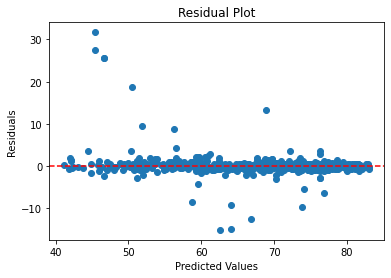

In [100]:
#DT Model Evaluation 
ModelEvaluation(DTmodel,X_test, y_test)

RandomForestRegressor

In [101]:
from sklearn.ensemble import RandomForestRegressor
RFmodel = RandomForestRegressor(random_state=42)
RFmodel.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

R^2 Score: 0.9801519594314826
Mean Absolute Error (MAE): 0.8403844827586172
Mean Squared Error (MSE): 2.028014246551723
Root Mean Squared Error (RMSE): 1.4240836515288429


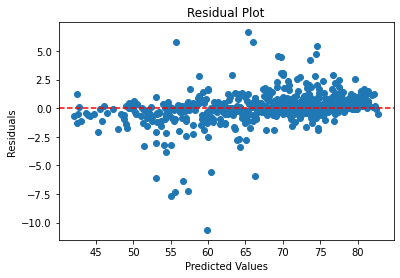

In [102]:
#DT Model Evaluation 
ModelEvaluation(RFmodel,X_test, y_test)

Panel regressions

Hausman Test To check which panel regressions


In [103]:
#pip install linearmodels
#import statsmodels.formula.api as smf
from linearmodels.panel import compare

# To perform the Hausman test
from linearmodels.panel import PanelOLS
from linearmodels.panel import RandomEffects

In [104]:
leap_df_cleaned1= pd.read_csv('./data/cleaned_file.csv')
leap_df_cleaned1.columns

Index(['country', 'year', 'life_expectancy', 'population',
       'annual_co2_emissions_scaled', 'animal_protein_per_day_person_scaled',
       'fat_per_day_person_scaled', 'carbs_per_day_person_scaled',
       'fertility_rate_scaled', 'rural_population_by_pop_scaled',
       'fixed_line_subscription_per_hundred_scaled',
       'mobile_line_subscription_per_hundred_scaled'],
      dtype='object')

In [105]:
# Fixed effects model
fe_model1 = PanelOLS.from_formula('life_expectancy ~  + population + annual_co2_emissions_scaled \
                                + animal_protein_per_day_person_scaled + fat_per_day_person_scaled + carbs_per_day_person_scaled \
                                + fertility_rate_scaled + rural_population_by_pop_scaled + fixed_line_subscription_per_hundred_scaled \
                                + mobile_line_subscription_per_hundred_scaled + EntityEffects',
                                data=leap_df_cleaned1.set_index(['country', 'year'])).fit()

# Random effects model
re_model1 = RandomEffects.from_formula('life_expectancy ~  + population + annual_co2_emissions_scaled \
                                + animal_protein_per_day_person_scaled + fat_per_day_person_scaled + carbs_per_day_person_scaled \
                                + fertility_rate_scaled + rural_population_by_pop_scaled + fixed_line_subscription_per_hundred_scaled \
                                + mobile_line_subscription_per_hundred_scaled',
                                data=leap_df_cleaned1.set_index(['country', 'year'])).fit()

# Compare models
comparison = compare([fe_model1, re_model1])
print(comparison)


                                    Model Comparison                                   
                                                            Model 0             Model 1
---------------------------------------------------------------------------------------
Dep. Variable                                       life_expectancy     life_expectancy
Estimator                                                  PanelOLS       RandomEffects
No. Observations                                               2899                2899
Cov. Est.                                                Unadjusted          Unadjusted
R-squared                                                    0.1490              0.2293
R-Squared (Within)                                           0.1490              0.0100
R-Squared (Between)                                          0.0892              0.5003
R-Squared (Overall)                                          0.0961              0.5069
F-statistic                     

Given the higher overall R-squared and better performance in explaining between-entity variation, Model 1 (RandomEffects) seems to be the better choice for predicting life_expectancy 

In [106]:
#Split the data into training and testing sets
train_data_re, test_data_re = train_test_split(leap_df_cleaned1, test_size=0.2, random_state=42)

# Re-index after splitting
train_data_re.set_index(['country', 'year'], inplace=True)
test_data_re.set_index(['country', 'year'], inplace=True)

# Separate dependent variable (y) and independent variables (X)
y_train_re = train_data_re['life_expectancy']
X_train_re = train_data_re[['population', 'annual_co2_emissions_scaled',
       'animal_protein_per_day_person_scaled', 'fat_per_day_person_scaled',
       'carbs_per_day_person_scaled', 'fertility_rate_scaled',
       'rural_population_by_pop_scaled',
       'fixed_line_subscription_per_hundred_scaled',
       'mobile_line_subscription_per_hundred_scaled']]
y_test_re = test_data_re['life_expectancy']
X_test_re = test_data_re[['population', 'annual_co2_emissions_scaled',
       'animal_protein_per_day_person_scaled', 'fat_per_day_person_scaled',
       'carbs_per_day_person_scaled', 'fertility_rate_scaled',
       'rural_population_by_pop_scaled',
       'fixed_line_subscription_per_hundred_scaled',
       'mobile_line_subscription_per_hundred_scaled']]

#Instantiate and fit the RandomEffects model
re_model = RandomEffects(y_train_re, X_train_re)
re_result = re_model.fit()

# Print the summary of the model
print(re_result)


                        RandomEffects Estimation Summary                        
Dep. Variable:        life_expectancy   R-squared:                        0.2562
Estimator:              RandomEffects   R-squared (Between):              0.5434
No. Observations:                2319   R-squared (Within):              -0.0204
Date:                Sun, May 26 2024   R-squared (Overall):              0.5479
Time:                        20:15:59   Log-likelihood                   -7064.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      88.391
Entities:                          73   P-value                           0.0000
Avg Obs:                       31.767   Distribution:                  F(9,2310)
Min Obs:                       1.0000                                           
Max Obs:                       41.000   F-statistic (robust):             88.391
                            

Saving the model

In [107]:
import pickle

In [108]:
data = {"model": RFmodel, "countriesList": CountryNames, "predictors":ColNames}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [109]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
print("Countries\n", data["countriesList"])
print("\nPredictors\n", data["predictors"])

Countries
 ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'AntiguaandBarbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda'
 'Bhutan' 'Bolivia' 'BosniaandHerzegovina' 'Botswana' 'Brazil' 'Bulgaria'
 'BurkinaFaso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'CentralAfricanRepublic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'CostaRica' "Coted'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark'
 'Djibouti' 'Dominica' 'DominicanRepublic' 'Ecuador' 'ElSalvador'
 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'FrenchPolynesia' 'Gabon' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iraq' 'Ireland' 'Israel' 'Italy']

Predictors
 ['year', 'population', 'annual_co2_emissions_scaled', 'animal_protein_per_day_person_scaled', 'fat_per_day_person_scaled', 'carbs_per_day_person_scaled', 'fe

In [110]:
#test output
regressor_loaded.predict([X_test.iloc[141]])

array([51.883])

Reference
https://www.youtube.com/watch?v=xl0N7tHiwlw